Derek Lamb
DSC640 
Week 5&6 Assignment

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # Ensure squarify is installed

# File paths
file_paths = {
    "vice_news": "/Users/dereklamb/Downloads/Motherboard VICE News Kia Hyundai Theft Data.xlsx",
    "kia_hyundai": "/Users/dereklamb/Downloads/kiaHyundaiThefts.csv",
    "car_thefts_map": "/Users/dereklamb/Downloads/carTheftsMap.csv",
    "milwaukee_data": "/Users/dereklamb/Downloads/KiaHyundaiMilwaukeeData.csv",
}

# Load the data
vice_news_data = pd.read_excel(file_paths["vice_news"])
kia_hyundai_data = pd.read_csv(file_paths["kia_hyundai"])
car_thefts_map_data = pd.read_csv(file_paths["car_thefts_map"])
milwaukee_data = pd.read_csv(file_paths["milwaukee_data"])

# Clean Vice News Data
vice_news_cleaned = vice_news_data.iloc[:, [0, 1, 2, 3]]  # Extract relevant columns
vice_news_cleaned.columns = ['date', 'kia_hyundai_thefts', 'all_thefts', 'kia_hyundai_percent']
vice_news_cleaned = vice_news_cleaned[1:]  # Drop header row
vice_news_cleaned['date'] = pd.to_datetime(vice_news_cleaned['date'], errors='coerce')
vice_news_cleaned['kia_hyundai_thefts'] = pd.to_numeric(vice_news_cleaned['kia_hyundai_thefts'], errors='coerce')
vice_news_cleaned['all_thefts'] = pd.to_numeric(vice_news_cleaned['all_thefts'], errors='coerce')
vice_news_cleaned['kia_hyundai_percent'] = pd.to_numeric(vice_news_cleaned['kia_hyundai_percent'], errors='coerce')

# Clean Milwaukee and Kia/Hyundai Data
kia_hyundai_data = kia_hyundai_data.rename(columns={
    'month': 'month', 'year': 'year', 'city': 'city', 'state': 'state',
    'countKiaHyundaiThefts': 'kia_hyundai_thefts', 'countOtherThefts': 'other_thefts',
    'percentKiaHyundai': 'kia_hyundai_percent'
})

milwaukee_data = milwaukee_data.rename(columns={
    'month': 'month', 'year': 'year', 'city': 'city', 'state': 'state',
    'countKiaHyundaiThefts': 'kia_hyundai_thefts', 'countOtherThefts': 'other_thefts',
    'percentKiaHyundai': 'kia_hyundai_percent'
})

# Combine Milwaukee and Kia/Hyundai Data
kia_hyundai_combined = pd.concat([kia_hyundai_data, milwaukee_data], ignore_index=True)

# Clean Car Thefts Map Data
car_thefts_map_data_cleaned = car_thefts_map_data.rename(columns={
    'geo_name': 'location', 'countCarThefts2019': 'thefts_2019',
    'countCarThefts2020': 'thefts_2020', 'countCarThefts2021': 'thefts_2021',
    'countCarThefts2022': 'thefts_2022', 'latitude': 'latitude',
    'longitude': 'longitude', 'percentChange2019to2022': 'percent_change'
})
print ("Code Complete")

Code Complete


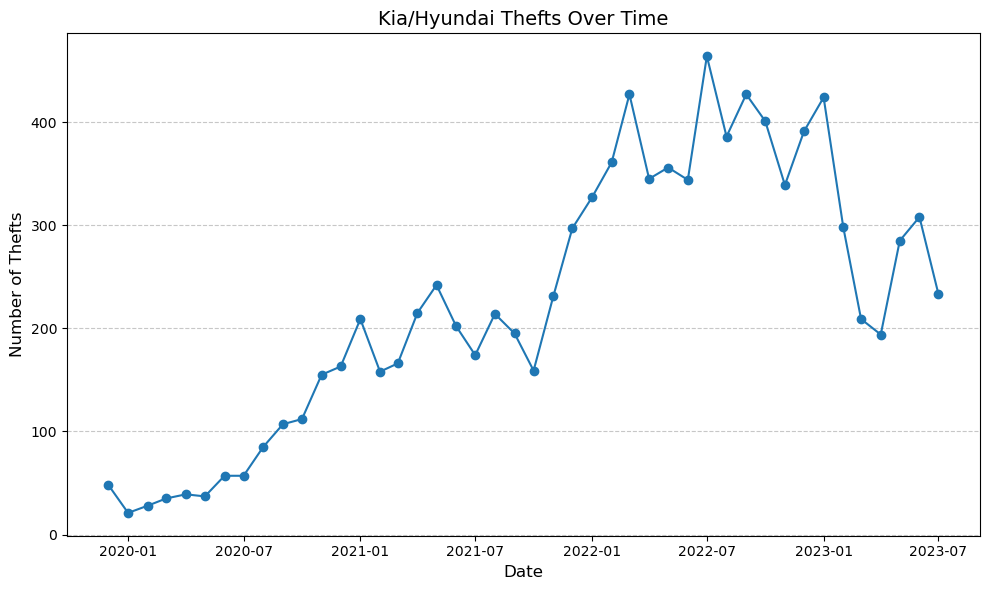

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(vice_news_cleaned['date'], vice_news_cleaned['kia_hyundai_thefts'], marker='o')
plt.title("Kia/Hyundai Thefts Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Thefts", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


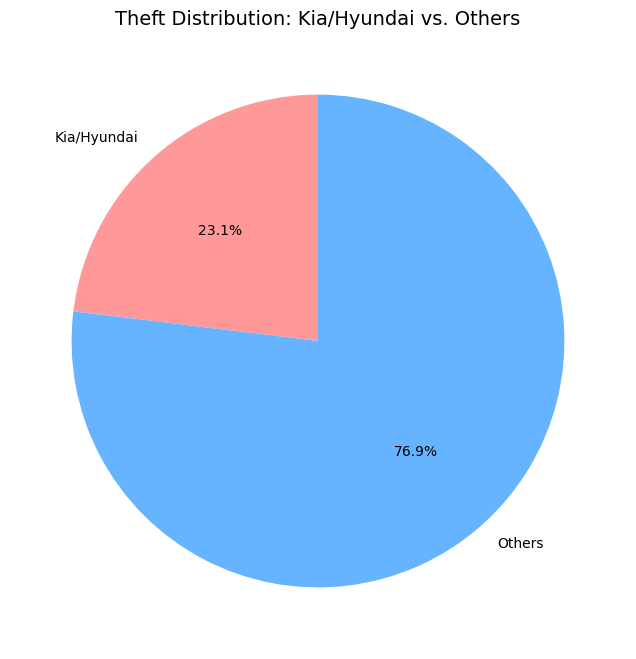

In [63]:
labels = ['Kia/Hyundai', 'Others']
sizes = [
    vice_news_cleaned['kia_hyundai_thefts'].sum(),
    vice_news_cleaned['all_thefts'].sum() - vice_news_cleaned['kia_hyundai_thefts'].sum()
]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title("Theft Distribution: Kia/Hyundai vs. Others", fontsize=14)
plt.show()


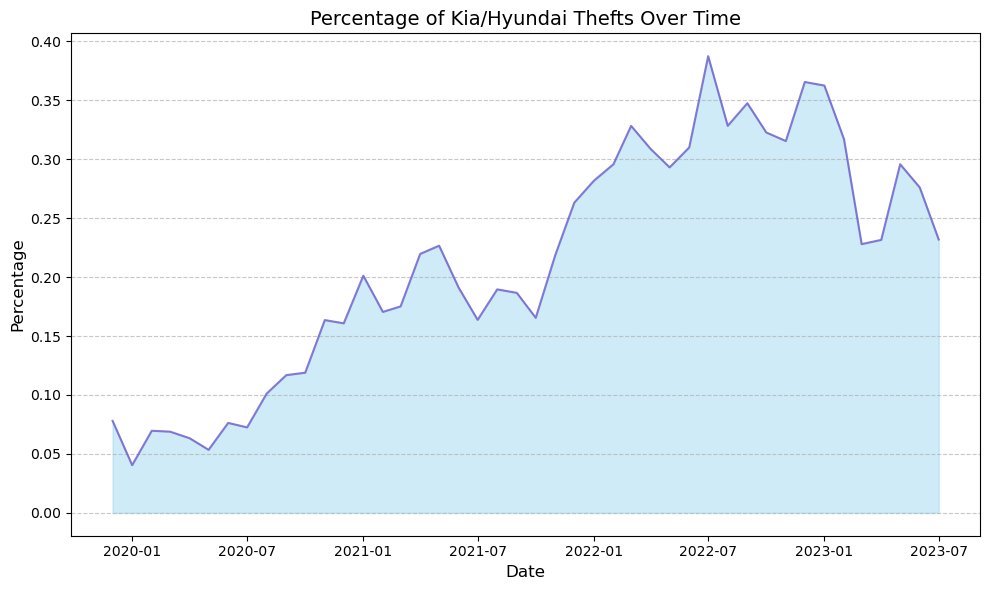

In [64]:
vice_news_cleaned = vice_news_cleaned.dropna(subset=['date', 'kia_hyundai_percent'])

plt.figure(figsize=(10, 6))
plt.fill_between(
    vice_news_cleaned['date'],
    vice_news_cleaned['kia_hyundai_percent'],
    color="skyblue",
    alpha=0.4,
)
plt.plot(vice_news_cleaned['date'], vice_news_cleaned['kia_hyundai_percent'], color="Slateblue", alpha=0.8)
plt.title("Percentage of Kia/Hyundai Thefts Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


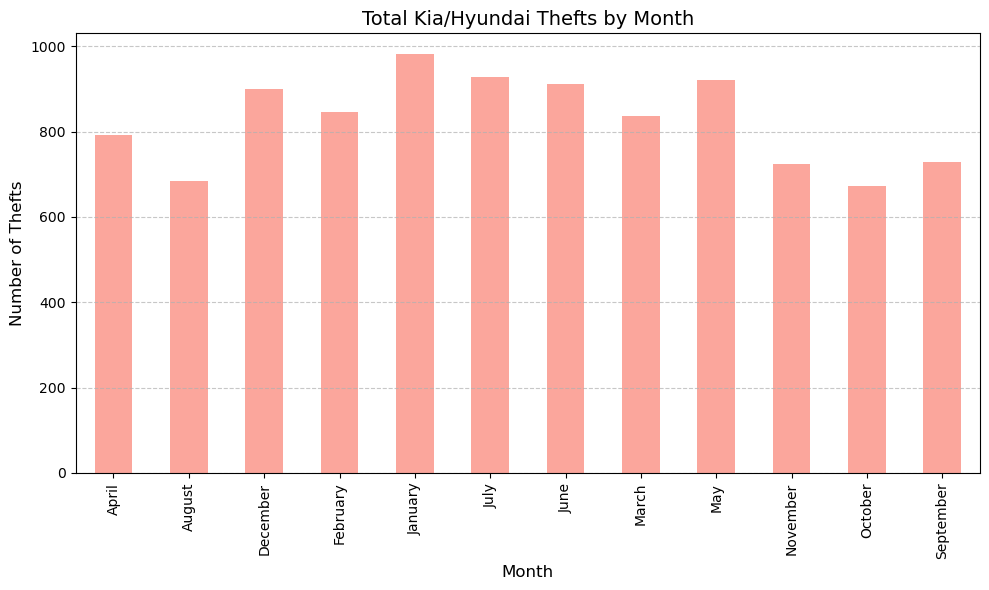

In [65]:
vice_news_cleaned['month'] = vice_news_cleaned['date'].dt.month_name()
theft_summary = vice_news_cleaned.groupby('month')['kia_hyundai_thefts'].sum().sort_index()

plt.figure(figsize=(10, 6))
theft_summary.plot(kind='bar', color='salmon', alpha=0.7)
plt.title("Total Kia/Hyundai Thefts by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Thefts", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


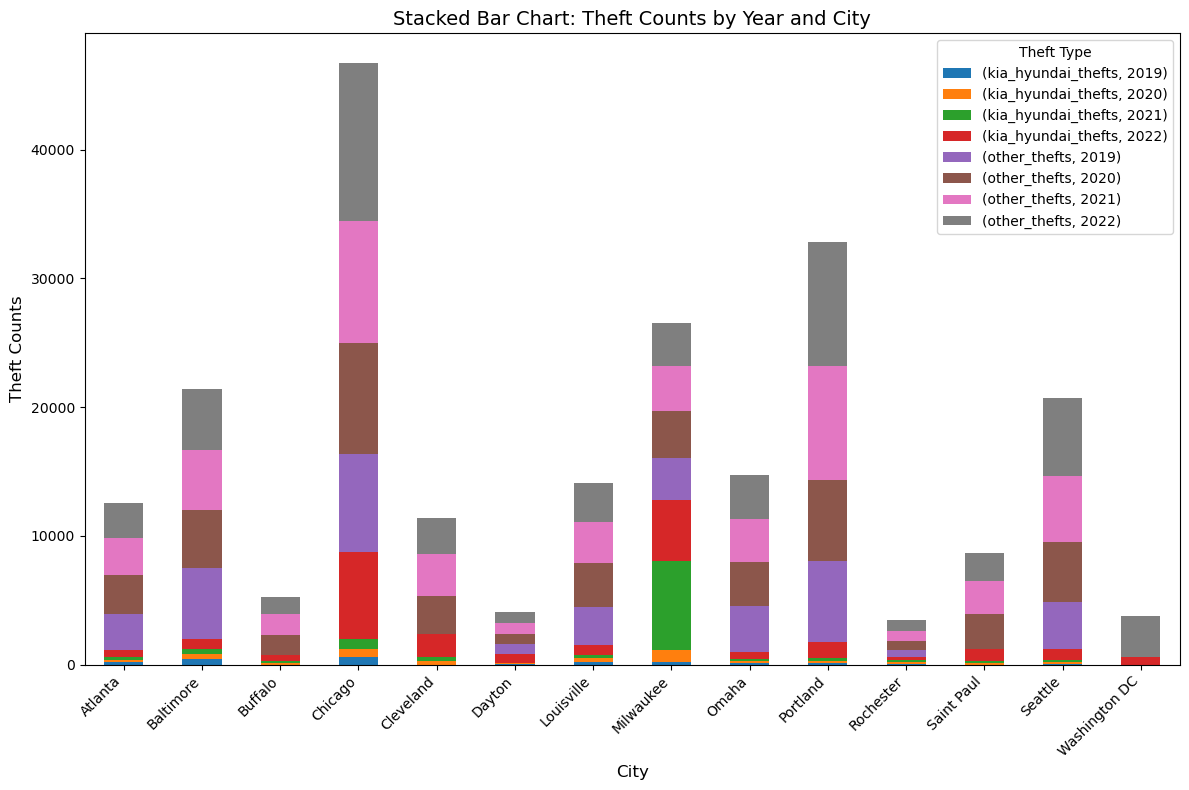

In [66]:
# Group data by city and year, summing the theft counts
kia_hyundai_combined['year'] = pd.to_numeric(kia_hyundai_combined['year'], errors='coerce')
stacked_data = kia_hyundai_combined.groupby(['city', 'year']).sum()[['kia_hyundai_thefts', 'other_thefts']].reset_index()

# Pivot the data for plotting
pivot_data = stacked_data.pivot(index='city', columns='year', values=['kia_hyundai_thefts', 'other_thefts'])

# Plotting the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Stacked Bar Chart: Theft Counts by Year and City", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Theft Counts", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Theft Type', fontsize=10)
plt.tight_layout()
plt.show()


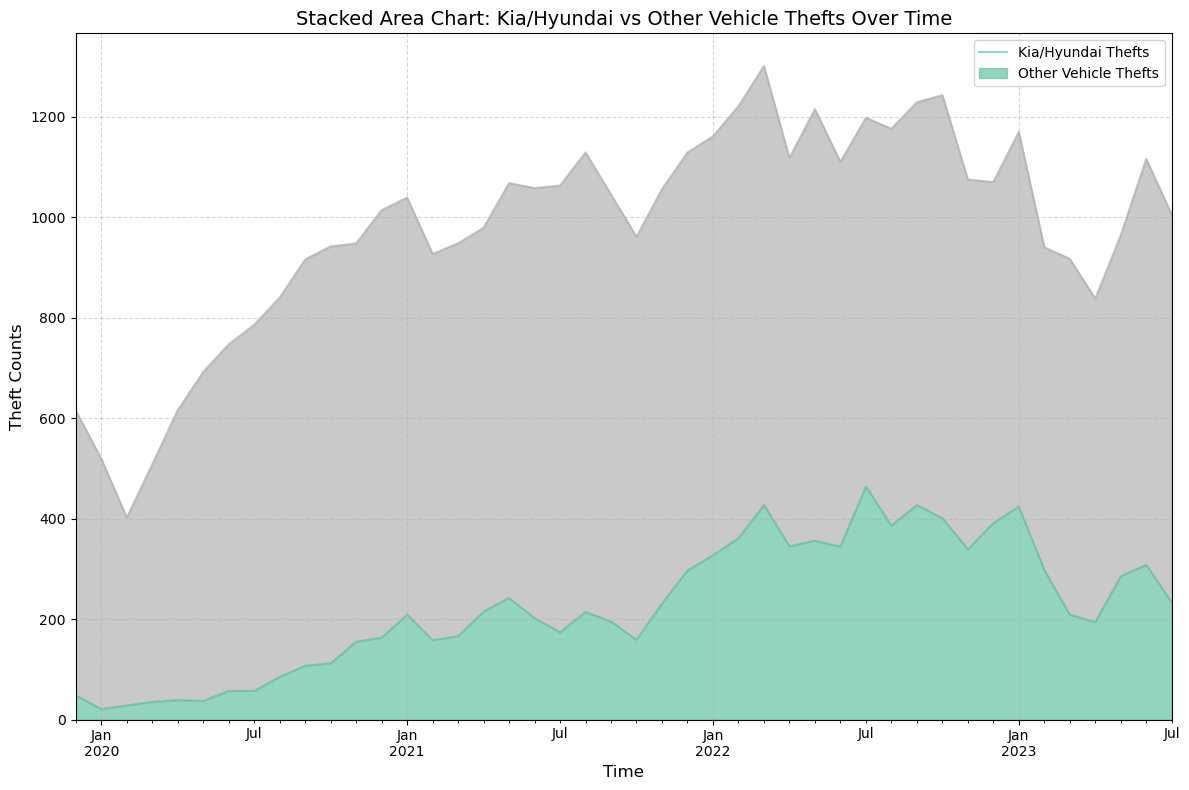

In [67]:
# Add 'year_month' column for grouping
vice_news_cleaned['year_month'] = vice_news_cleaned['date'].dt.to_period('M')

# Group data by 'year_month' and sum numeric columns
area_data = vice_news_cleaned.groupby('year_month')[['kia_hyundai_thefts', 'all_thefts']].sum().reset_index()

# Convert 'year_month' back to datetime for plotting
area_data['year_month'] = area_data['year_month'].dt.to_timestamp()

# Calculate other vehicle thefts
area_data['other_thefts'] = area_data['all_thefts'] - area_data['kia_hyundai_thefts']

# Prepare data for stacked area chart
stacked_area_data = area_data[['year_month', 'kia_hyundai_thefts', 'other_thefts']].set_index('year_month')

# Plotting the stacked area chart
stacked_area_data.plot(kind='area', stacked=True, figsize=(12, 8), alpha=0.7, colormap='Set2')
plt.title("Stacked Area Chart: Kia/Hyundai vs Other Vehicle Thefts Over Time", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Theft Counts", fontsize=12)
plt.legend(["Kia/Hyundai Thefts", "Other Vehicle Thefts"], fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


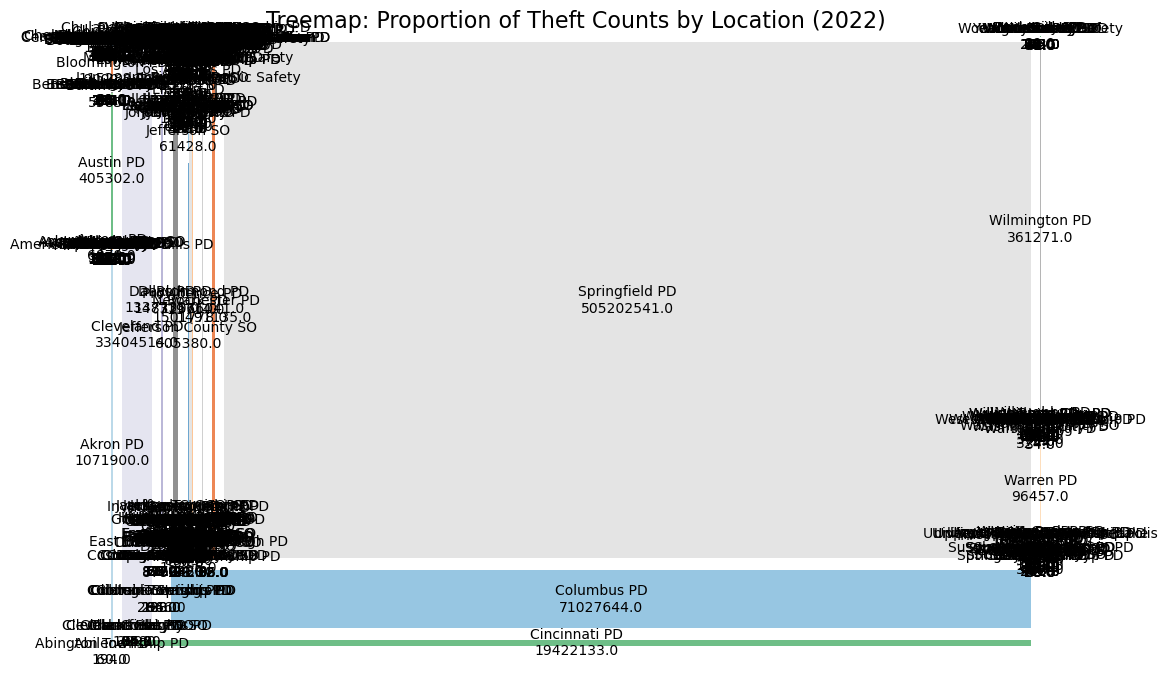

In [68]:
# Aggregate theft counts by location for 2022 and ensure values are numeric
treemap_data = car_thefts_map_data_cleaned.groupby('location').sum()['thefts_2022']
treemap_data = pd.to_numeric(treemap_data, errors='coerce').dropna()  # Ensure numeric data

# Prepare sizes and labels for the treemap
sizes = treemap_data.values
labels = [f"{loc}\n{count}" for loc, count in zip(treemap_data.index, treemap_data.values)]

# Plot the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, pad=True, color=plt.cm.tab20c.colors)
plt.title("Treemap: Proportion of Theft Counts by Location (2022)", fontsize=16)
plt.axis('off')  # Hide axes
plt.show()

